      CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
184      4.5      1616.50      -200  21.312687        1332.50    349.0   
185      2.8      1472.75      -200  14.305786        1126.50    224.0   
186      2.2      1378.50      -200  12.521106        1067.50    171.0   
187      2.2      1385.25      -200  12.192364        1056.25    149.0   
188      2.3      1378.75      -200  13.092245        1086.75    137.0   
...      ...          ...       ...        ...            ...      ...   
9352     3.1      1314.25      -200  13.529605        1101.25    471.7   
9353     2.4      1162.50      -200  11.355157        1027.00    353.3   
9354     2.4      1142.00      -200  12.374538        1062.50    293.0   
9355     2.1      1002.50      -200   9.547187         960.50    234.5   
9356     2.2      1070.75      -200  11.932060        1047.25    265.2   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  
184         685.75    150.0       2010.00      1818.50

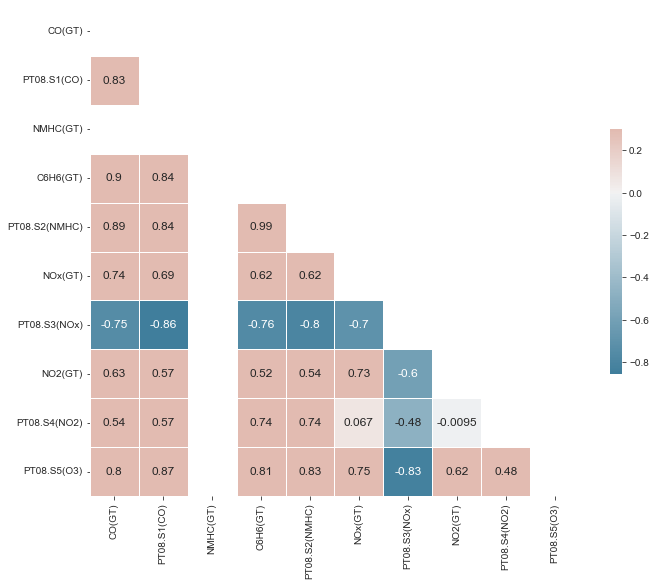

In [2]:
#Heatmap with label (or annotation) and mask
#Seaborn for correlation heatmaps with labels or annotations
#adapted from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

#4.2.4.1	Is there a significant correlation between the air pollutants in this specific area?
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
#read in the pima-indians-diabetese.xlsx dataset
#read in the pima-indians-diabetese.xlsx dataset
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

airQualityDataSet = remove(aqDataSet_raw, index_list)


airQualityDataSet = pd.DataFrame(airQualityDataSet, columns= ["CO(GT)","PT08.S1(CO)","NMHC(GT)",
                                                              "C6H6(GT)","PT08.S2(NMHC)",
                                                              "NOx(GT)","PT08.S3(NOx)","NO2(GT)",
                                                              "PT08.S4(NO2)","PT08.S5(O3)"])
print (airQualityDataSet)
 
 
#create a correlation matrix for all the column sets except the target variable
correlation = airQualityDataSet.corr()
print("\n")
print("Pearson Standard Correlation Coefficient Matrix")
print(correlation)
print("\n")
 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))
 

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
#Set up a seaborn heatmap
#seaborne aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html 
sns.set_style("white")
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
#Turn on annotations for correlation values
#annot = True
#annot_kws = {"size": 12}
 # Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot = True, annot_kws = {"size": 12})
 
#Add ticks for labels
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
 
#Export heatmap as an image
heatmap.get_figure().savefig('heatmap_diabetes.png', bbox_inches='tight')


      NOx(GT)          T      RH        AH
184     349.0  17.850000  40.525  0.820964
185     224.0  20.800001  34.450  0.836456
186     171.0  23.850000  28.175  0.821851
187     149.0  24.150000  28.675  0.851493
188     137.0  25.150001  24.850  0.782925
...       ...        ...     ...       ...
9352    471.7  21.850000  29.250  0.756824
9353    353.3  24.325000  23.725  0.711864
9354    293.0  26.900000  18.350  0.640649
9355    234.5  28.325000  13.550  0.513866
9356    265.2  28.500000  13.125  0.502804

[5463 rows x 4 columns]


Pearson Standard Correlation Coefficient Matrix
          NOx(GT)         T        RH        AH
NOx(GT)  1.000000 -0.312754  0.199684 -0.220768
T       -0.312754  1.000000 -0.564184  0.665458
RH       0.199684 -0.564184  1.000000  0.171492
AH      -0.220768  0.665458  0.171492  1.000000




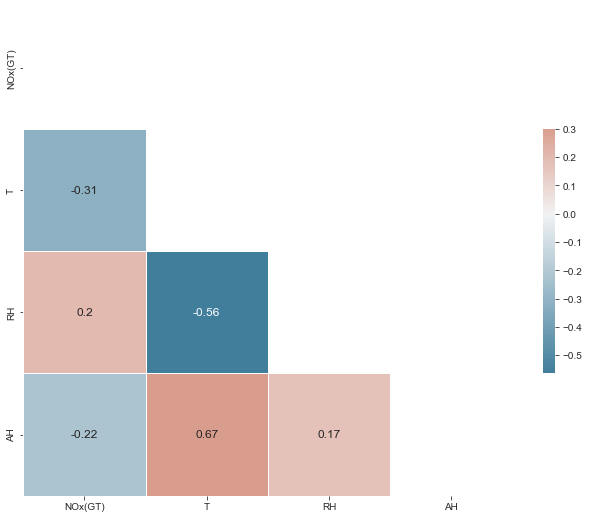

In [4]:
#4.2.4.2	Is there a correlation between pollutant NOx(GT) concentration and other weather factors (temperature, absolute humidity, relative humidity)?



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
#read in the pima-indians-diabetese.xlsx dataset
#read in the pima-indians-diabetese.xlsx dataset
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

airQualityDataSet = remove(aqDataSet_raw, index_list)

airQualityDataSet = pd.DataFrame(airQualityDataSet, columns= ["NOx(GT)","T","RH","AH"])
print (airQualityDataSet)
 
 
#create a correlation matrix for all the column sets except the target variable
correlation = airQualityDataSet.corr()
print("\n")
print("Pearson Standard Correlation Coefficient Matrix")
print(correlation)
print("\n")
 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))
 

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
#Set up a seaborn heatmap
#seaborne aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html 
sns.set_style("white")
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
#Turn on annotations for correlation values
#annot = True
#annot_kws = {"size": 12}
 # Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot = True, annot_kws = {"size": 12})
 
#Add ticks for labels
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
 
#Export heatmap as an image
heatmap.get_figure().savefig('heatmap_diabetes.png', bbox_inches='tight')

      NO2(GT)          T      RH        AH
184     150.0  17.850000  40.525  0.820964
185     152.0  20.800001  34.450  0.836456
186     139.0  23.850000  28.175  0.821851
187     133.0  24.150000  28.675  0.851493
188     126.0  25.150001  24.850  0.782925
...       ...        ...     ...       ...
9352    189.8  21.850000  29.250  0.756824
9353    179.2  24.325000  23.725  0.711864
9354    174.7  26.900000  18.350  0.640649
9355    155.7  28.325000  13.550  0.513866
9356    167.7  28.500000  13.125  0.502804

[5463 rows x 4 columns]


Pearson Standard Correlation Coefficient Matrix
          NO2(GT)         T        RH        AH
NO2(GT)  1.000000 -0.227602 -0.145761 -0.427731
T       -0.227602  1.000000 -0.564184  0.665458
RH      -0.145761 -0.564184  1.000000  0.171492
AH      -0.427731  0.665458  0.171492  1.000000




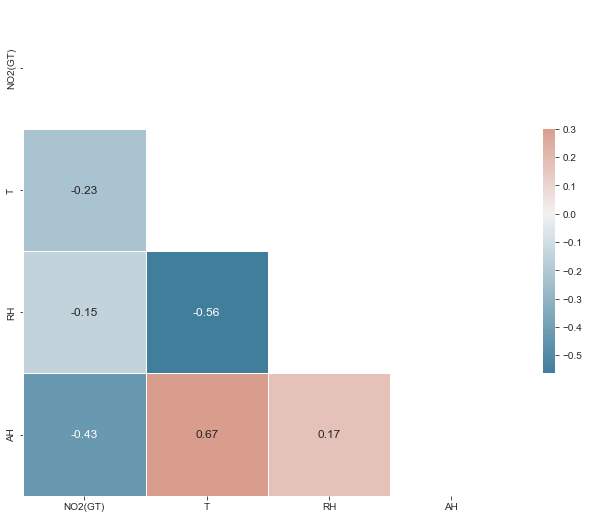

In [6]:
#4.2.4.3	Is there a correlation between pollutant NO2(GT) concentration and other weather factors (temperature, absolute humidity, relative humidity)?

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 


#read in the pima-indians-diabetese.xlsx dataset
#read in the pima-indians-diabetese.xlsx dataset
#load data set and explore
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

airQualityDataSet = remove(aqDataSet_raw, index_list)


airQualityDataSet = pd.DataFrame(airQualityDataSet, columns= [ "NO2(GT)","T","RH","AH"])
print (airQualityDataSet)
 
 
#create a correlation matrix for all the column sets except the target variable
correlation = airQualityDataSet.corr()
print("\n")
print("Pearson Standard Correlation Coefficient Matrix")
print(correlation)
print("\n")
 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))
 

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
#Set up a seaborn heatmap
#seaborne aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html 
sns.set_style("white")
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
#Turn on annotations for correlation values
#annot = True
#annot_kws = {"size": 12}
 # Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot = True, annot_kws = {"size": 12})
 
#Add ticks for labels
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
 
#Export heatmap as an image
heatmap.get_figure().savefig('heatmap_diabetes.png', bbox_inches='tight')

      PT08.S3(NOx)          T      RH        AH
184         685.75  17.850000  40.525  0.820964
185         830.50  20.800001  34.450  0.836456
186         898.75  23.850000  28.175  0.821851
187         891.00  24.150000  28.675  0.851493
188         901.25  25.150001  24.850  0.782925
...            ...        ...     ...       ...
9352        538.50  21.850000  29.250  0.756824
9353        603.75  24.325000  23.725  0.711864
9354        603.25  26.900000  18.350  0.640649
9355        701.50  28.325000  13.550  0.513866
9356        654.00  28.500000  13.125  0.502804

[5463 rows x 4 columns]


Pearson Standard Correlation Coefficient Matrix
              PT08.S3(NOx)         T        RH        AH
PT08.S3(NOx)      1.000000 -0.085542 -0.130067 -0.213527
T                -0.085542  1.000000 -0.564184  0.665458
RH               -0.130067 -0.564184  1.000000  0.171492
AH               -0.213527  0.665458  0.171492  1.000000




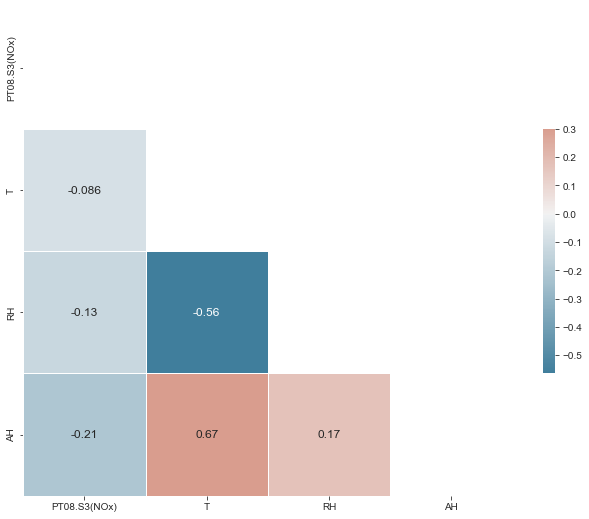

In [7]:
#4.2.4.4	Is there a correlation between pollutant PT08.S3(NOx)concentration and other weather factors (temperature, absolute humidity, relative humidity)?


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
#read in the pima-indians-diabetese.xlsx dataset
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

airQualityDataSet = remove(aqDataSet_raw, index_list)
airQualityDataSet = pd.DataFrame(airQualityDataSet, columns= [ "PT08.S3(NOx)","T","RH","AH"])
print (airQualityDataSet)
 
 
#create a correlation matrix for all the column sets except the target variable
correlation = airQualityDataSet.corr()
print("\n")
print("Pearson Standard Correlation Coefficient Matrix")
print(correlation)
print("\n")
 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))
 

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
#Set up a seaborn heatmap
#seaborne aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html 
sns.set_style("white")
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
#Turn on annotations for correlation values
#annot = True
#annot_kws = {"size": 12}
 # Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot = True, annot_kws = {"size": 12})
 
#Add ticks for labels
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
 
#Export heatmap as an image
heatmap.get_figure().savefig('heatmap_diabetes.png', bbox_inches='tight')

      PT08.S4(NO2)          T      RH        AH
184        2010.00  17.850000  40.525  0.820964
185        1752.00  20.800001  34.450  0.836456
186        1662.50  23.850000  28.175  0.821851
187        1648.00  24.150000  28.675  0.851493
188        1660.25  25.150001  24.850  0.782925
...            ...        ...     ...       ...
9352       1374.25  21.850000  29.250  0.756824
9353       1263.50  24.325000  23.725  0.711864
9354       1240.75  26.900000  18.350  0.640649
9355       1041.00  28.325000  13.550  0.513866
9356       1128.50  28.500000  13.125  0.502804

[5463 rows x 4 columns]


Pearson Standard Correlation Coefficient Matrix
              PT08.S4(NO2)         T        RH        AH
PT08.S4(NO2)      1.000000  0.688571 -0.079125  0.742182
T                 0.688571  1.000000 -0.564184  0.665458
RH               -0.079125 -0.564184  1.000000  0.171492
AH                0.742182  0.665458  0.171492  1.000000




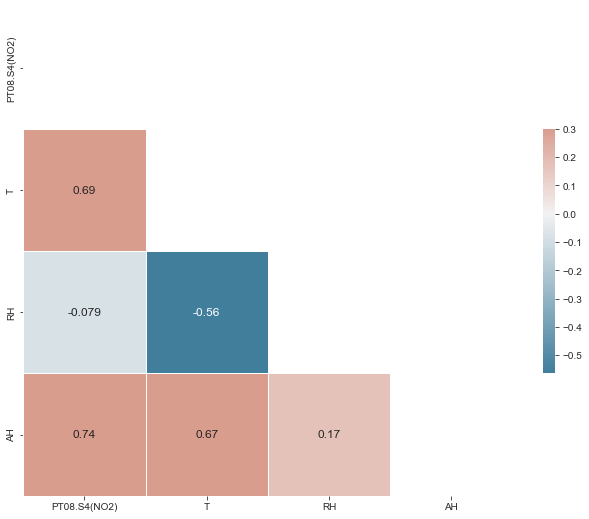

In [8]:
#4.2.4.5	Is there a correlation between pollutant PT08.S4(NO2) concentration and other weather factors (temperature, absolute humidity, relative humidity)?
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
#read in the pima-indians-diabetese.xlsx dataset

#read in the pima-indians-diabetese.xlsx dataset
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

airQualityDataSet = remove(aqDataSet_raw, index_list)

airQualityDataSet = pd.DataFrame(airQualityDataSet, columns= [ "PT08.S4(NO2)","T","RH","AH"])
print (airQualityDataSet)
 
 
#create a correlation matrix for all the column sets except the target variable
correlation = airQualityDataSet.corr()
print("\n")
print("Pearson Standard Correlation Coefficient Matrix")
print(correlation)
print("\n")
 
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))
 

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
 
#Set up a seaborn heatmap
#seaborne aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html 
sns.set_style("white")
 
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
 
#Turn on annotations for correlation values
#annot = True
#annot_kws = {"size": 12}
 # Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot = True, annot_kws = {"size": 12})
 
#Add ticks for labels
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
 
#Export heatmap as an image
heatmap.get_figure().savefig('heatmap_diabetes.png', bbox_inches='tight')

In [9]:
# 4.2.5.1	Is there any linear relationship between pollutant NO2’s concentration and temperature?
#Correlation Hypothesis Testing by using pvalues
import pandas as pd
from scipy import stats
 
#Read data and build a dataframe
#read in the pima-indians-diabetese.xlsx dataset
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
# define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
#+/- 1.5 * IQR

def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 -1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

# create an empty list to store the output indices from multiple columns
aqDataSet_raw = pd.read_excel("AirQualityUCI.xlsx")
index_list = []
for feature in ["CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)",
                "PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)","T", "AH", "RH"]:
    index_list.extend(outliers(aqDataSet_raw, feature))
    
# define a function called "remove" which returns a cleanset dataframe without outliers

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

airQualityDataSet = remove(aqDataSet_raw, index_list)
 
#Calculate Pearson Correlation r and p value
pearsonCoeff_rvalue, p_value = stats.pearsonr(airQualityDataSet["NO2(GT)"], airQualityDataSet["T"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient r value : ", pearsonCoeff_rvalue.round(decimals=3), "and a P-value of:", p_value.round(decimals =3)) # Results 
print("\n")
 
#Conduct Correlation Coefficient Hypothesis Testing
#Use 2 tail test
#Confidence level is 95%, alpha is 0.05 and alpha/2 is 0.025
alpha = 0.05
alpha_half = 0.025
 
if p_value < alpha_half:  # null hypothesis: x comes from a normal distribution
    print("Conclusion drawn: The null hypothesis can be rejected")
else:
    print("Conclusion drawn: The null hypothesis is accepted")


Pearson Correlation Coefficient r value :  -0.228 and a P-value of: 0.0


Conclusion drawn: The null hypothesis can be rejected


In [10]:
#4.2.5.2	 Is there any linear relationship between pollutant NO2’s correlation and relative humidity?
import pandas as pd
from scipy import stats
 
#Read data and build a dataframe
 
#Calculate Pearson Correlation r and p value
pearsonCoeff_rvalue, p_value = stats.pearsonr(airQualityDataSet["NO2(GT)"], airQualityDataSet["RH"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient r value : ", pearsonCoeff_rvalue.round(decimals=3), "and a P-value of:", p_value.round(decimals =3)) # Results 
print("\n")
 
#Conduct Correlation Coefficient Hypothesis Testing
#Use 2 tail test
#Confidence level is 99%, alpha is 0.01 and alpha/2 is 0.005
alpha = 0.01
alpha_half = 0.005
 
if p_value < alpha_half:  # null hypothesis: x comes from a normal distribution
    print("Conclusion drawn: The null hypothesis can be rejected")
else:
    print("Conclusion drawn: The null hypothesis is accepted")


Pearson Correlation Coefficient r value :  -0.146 and a P-value of: 0.0


Conclusion drawn: The null hypothesis can be rejected
